In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [55]:
df_train = pd.read_csv('titanic/train.csv')
df_test = pd.read_csv('titanic/test.csv')

# 1. Dataset EDA

In [56]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Dataset Information

### Dataset Size and Structure

In [58]:
train_rows, train_cols = df_train.shape
test_rows, test_cols = df_test.shape

print(f'Train DF: {train_rows} rows, {train_cols} cols')
print(f'Test DF: {test_rows} rows, {test_cols} cols')

Train DF: 891 rows, 12 cols
Test DF: 418 rows, 11 cols


In [59]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [60]:
df_train.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [61]:
df_test.isna().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

### Summary Statistics
   - What are the measures of central tendency (mean, median)?
   - What are the measures of dispersion (standard deviation, range)?

In [62]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [63]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Visualizations

### Survival Stats by Age Group

In [64]:
# Create a Age Group Range
def update_age_groups(df):
    df['Age Group'] = pd.cut(x=df['Age'], bins=[0, 20, 40, 60, 80], labels=['0-20', '21-40', '41-60', '61-80'])
    df.drop(labels=['Age'], axis=1, inplace=True)
    return df
df_train = update_age_groups(df_train)

In [72]:
survival_percentage_by_age_group = round(df_train.groupby('Age Group')['Survived'].mean()*100, 2).reset_index(name='Survival Percentage')
survival_percentage_by_age_group

,Age Group,Survival Percentage
0,0-20,45.81
1,21-40,39.74
2,41-60,39.06
3,61-80,22.73


<AxesSubplot:xlabel='Age Group', ylabel='Survival Percentage'>

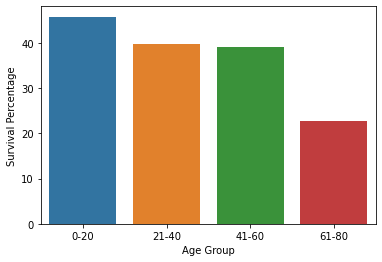

In [73]:
sns.barplot(x='Age Group', y='Survival Percentage', data=survival_percentage_by_age_group)

### Survival stats by Sex

In [133]:
df_train.groupby(by=['Sex'])['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

In [134]:
df_train[df_train['Survived']==1].groupby(by=['Sex'])['Sex'].count()

Sex
female    233
male      109
Name: Sex, dtype: int64

In [135]:
gender_group_survived = round(df_train.groupby(by=['Sex'])['Survived'].mean()*100, 2).reset_index(name='Survival Percentage')
gender_group_survived

,Sex,Survival Percentage
0,female,74.20
1,male,18.89


<AxesSubplot:xlabel='Sex', ylabel='Survival Percentage'>

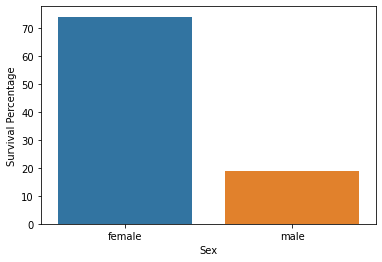

In [136]:
sns.barplot(x='Sex', y='Survival Percentage', data=gender_group_survived)

### Survival stats by Passenger Class

##### Total Passengers by Class

<AxesSubplot:xlabel='Pclass', ylabel='count'>

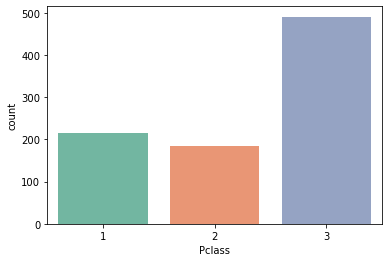

In [137]:
sns.countplot(x='Pclass', palette='Set2', data=df_train)

##### Survival Percentage by Class

In [142]:
df_train.groupby(by=['Pclass'])['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survival Percentage'>

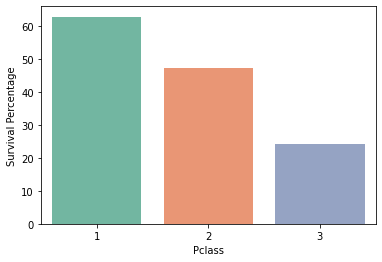

In [138]:
class_group_survived_pct = round(df_train.groupby(by=['Pclass'])['Survived'].mean()*100, 2).reset_index(name='Survival Percentage')
class_group_survived_pct

sns.barplot(x='Pclass', y='Survival Percentage', palette='Set2', data=class_group_survived_pct)

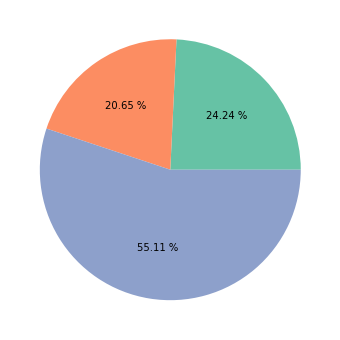

In [146]:
plt.figure(figsize=(6, 6))
colors = sns.color_palette('Set2')
plt.pie(x=df_train.groupby(by=['Pclass'])['Survived'].count(), autopct="%1.2f %%", colors=colors)
plt.show()

#### Embarkment Port

In [120]:
embarked_count_survived_pct = round(df_train.groupby('Embarked')['Survived'].mean()*100, 2).reset_index(name='Survival Percentage')

##### Count Plot of Ports from where Passengers Embarked

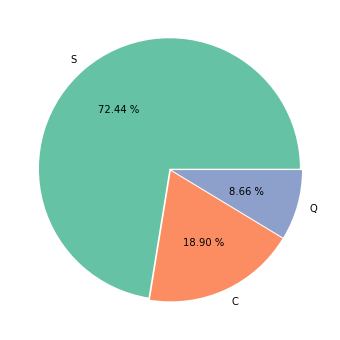

In [121]:
labels = df_train['Embarked'].unique().tolist()
labels.remove(np.nan)

palette_color = sns.color_palette('Set2') 
embarked_counts = df_train['Embarked'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(x=embarked_counts, autopct="%1.2f %%", explode=[0.01, 0.01, 0.01], labels=embarked_counts.index, colors=palette_color)
plt.show()

##### Survival Rate wrt Embarkment Port

In [122]:
embarked_count_survived_pct

,Embarked,Survival Percentage
0,C,55.36
1,Q,38.96
2,S,33.70


<AxesSubplot:xlabel='Embarked', ylabel='Survival Percentage'>

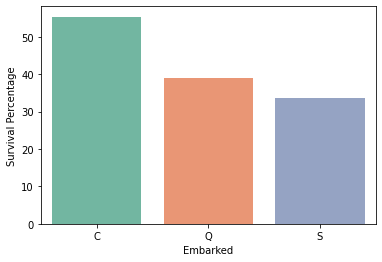

In [123]:
sns.barplot(x='Embarked', y='Survival Percentage', data=embarked_count_survived_pct, palette='Set2')

# 2. Data Preprocessing

In [102]:
df_train = pd.read_csv('titanic/train.csv')
df_test = pd.read_csv('titanic/test.csv')

X = df_train.drop(labels='Survived', axis=1)
X = update_age_groups(X)

y = df_train['Survived']

x_test = update_age_groups(df_test)

In [103]:
cols_to_drop = ['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin']
passenger_ids = x_test['PassengerId']

X.drop(labels=cols_to_drop, axis=1, inplace=True)
x_test.drop(labels=cols_to_drop, axis=1, inplace=True)

In [104]:
X.isna().sum()

Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       2
Age Group    177
dtype: int64

In [105]:
x_test.isna().sum()

Pclass        0
Sex           0
SibSp         0
Parch         0
Embarked      0
Age Group    86
dtype: int64

In [106]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [107]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cols_to_impute = ['Age Group','Embarked']

X[cols_to_impute] = imputer.fit_transform(X[cols_to_impute])
x_test[cols_to_impute] = imputer.transform(x_test[cols_to_impute])

In [108]:
x_test

,Pclass,Sex,SibSp,Parch,Embarked,Age Group
0,3,male,0,0,Q,21-40
1,3,female,1,0,S,41-60
2,2,male,0,0,Q,61-80
3,3,male,0,0,S,21-40
4,3,female,1,1,S,21-40
...,...,...,...,...,...,...
413,3,male,0,0,S,21-40
414,1,female,0,0,C,21-40
415,3,male,0,0,S,21-40
416,3,male,0,0,S,21-40


In [109]:
encoder = LabelEncoder()

In [110]:
label_cols = ['Sex', 'Embarked', 'Age Group']
for col in label_cols:
    X[col]= encoder.fit_transform(X[col])
    x_test[col] = encoder.transform(x_test[col])

In [111]:
X.head()

,Pclass,Sex,SibSp,Parch,Embarked,Age Group
0,3,1,1,0,2,1
1,1,0,1,0,0,1
2,3,0,0,0,2,1
3,1,0,1,0,2,1
4,3,1,0,0,2,1


In [112]:
x_test.head()

,Pclass,Sex,SibSp,Parch,Embarked,Age Group
0,3,1,0,0,1,1
1,3,0,1,0,2,2
2,2,1,0,0,1,3
3,3,1,0,0,2,1
4,3,0,1,1,2,1


In [113]:
X.isna().sum()

Pclass       0
Sex          0
SibSp        0
Parch        0
Embarked     0
Age Group    0
dtype: int64

In [114]:
# X.drop(labels=['SibSp', 'Parch'], axis = 1, inplace=True)
# x_test.drop(labels=['SibSp', 'Parch'], axis = 1, inplace=True)

<AxesSubplot:>

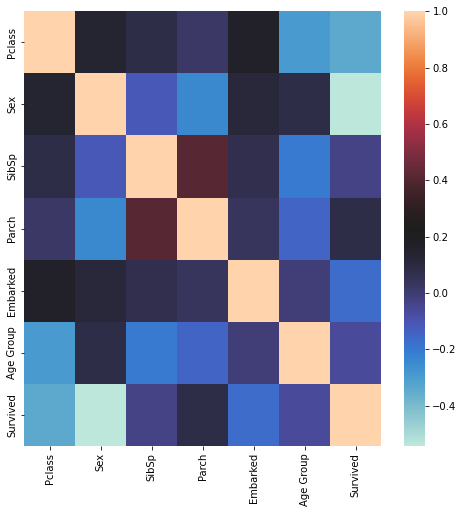

In [115]:
plt.figure(figsize=(8, 8))
sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(pd.concat([X, y], axis=1).corr(), cmap='icefire')

# 3. Model Creating and Prediction

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

regressor = RandomForestClassifier(n_estimators=1000)
# regressor = SVC(kernel='rbf', degree=7)
# regressor = DecisionTreeClassifier(criterion='gini', max_features=3)
# regressor = GradientBoostingClassifier(learning_rate=0.01, criterion='mse')
# regressor = KNeighborsClassifier(n_neighbors=9)

# Logistic Regression
# solver : {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'},             default='lbfgs'
# penalty : {'l1', 'l2', 'elasticnet', 'none'}, default='l2'

# SVC
# kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}


from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=43)

regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_val)
round(accuracy_score(y_true=y_val, y_pred=y_pred)*100, 2)

77.65

##### Fitting on the Entire Training Dataset

In [117]:
regressor.fit(X, y)

RandomForestClassifier(n_estimators=1000)

In [118]:
test_pred = regressor.predict(x_test)
df_test = pd.read_csv('titanic/test.csv')

In [119]:
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': test_pred})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
